## KNN algorithm 

- we can use it in regression and classification problems (Supervised Models)
- but we use this mostly on classification problems
- 

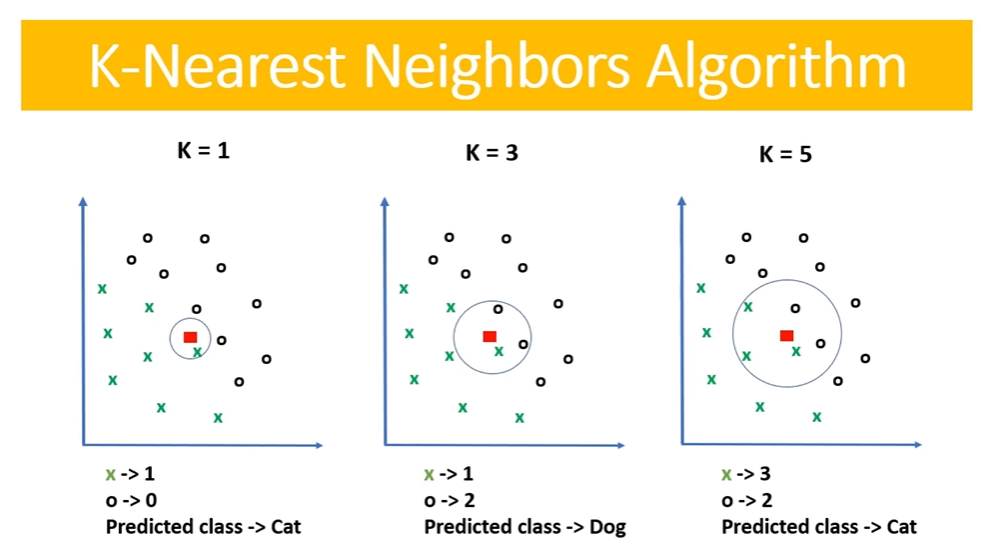

- in here we have to give a value to the k . after that this algorithm will get the nearest data points according to the value of the k

In [5]:
import numpy as np
import pandas as pd

In [7]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.shape

(150, 6)

In [13]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [15]:
data.info()   # there is no null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
data.describe()   # we have to check the scale and do the fature scaling 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [23]:
x = data.iloc[:,1:5]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y = data.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [31]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()

In [33]:
x = scaler.fit_transform(x)
x[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [35]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [37]:
x_train.shape

(120, 4)

In [39]:
x_test.shape

(30, 4)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train ,y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
pred = model.predict(x_test)
pred[0:5]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [49]:
y_test[0:5]

76     Iris-versicolor
65     Iris-versicolor
56     Iris-versicolor
42         Iris-setosa
121     Iris-virginica
Name: Species, dtype: object

In [51]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,pred)
accuracy

0.9

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  2,  8]], dtype=int64)

In [61]:
#  3 data points are wrong from the 30 correct one is in 10,9,8

In [63]:
result = pd.DataFrame(data=[y_test.values,pred],index=['y_test','y_pred'])
result.transpose()

,y_test,y_pred
0,Iris-versicolor,Iris-versicolor
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-setosa,Iris-setosa
6,Iris-virginica,Iris-virginica
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-virginica,Iris-virginica


In [65]:
# so now we have to find the best k value

In [73]:
correct_sum = []
for i in range(1,20): 
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    correct = np.sum(pred==y_test)
    correct_sum.append(correct)

In [75]:
correct_sum

[27, 27, 27, 27, 28, 28, 27, 27, 27, 27, 27, 27, 28, 27, 28, 28, 28, 29, 29]

In [77]:
result = pd.DataFrame(data=correct_sum)
result.index = result.index+1
result.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,27,27,27,27,28,28,27,27,27,27,27,27,28,27,28,28,28,29,29


In [79]:
model = KNeighborsClassifier(n_neighbors=18)
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [81]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.9666666666666667

In [83]:
cm = confusion_matrix(y_test,pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)